

# Decision Trees

Decision trees are an effective and popular classification (and regression) method initially developed by Leo Breiman and others in 1984.

A tree model is a set of “if-then-else” rules that are easy to understand and to implement.  In  contrast  to  regression  and  logistic  regression,  trees  have  the  ability  to  discover  hidden  patterns  corresponding  to  complex  interactions  in  the  data.  However, unlike KNN or naive Bayes, simple tree models can be expressed in terms of predictor relationships that are easily interpretable.

# Introduction
Golf dataset again:
For him it depends on a variety of factors, such as: weather, temperature, humidity, wind etc..

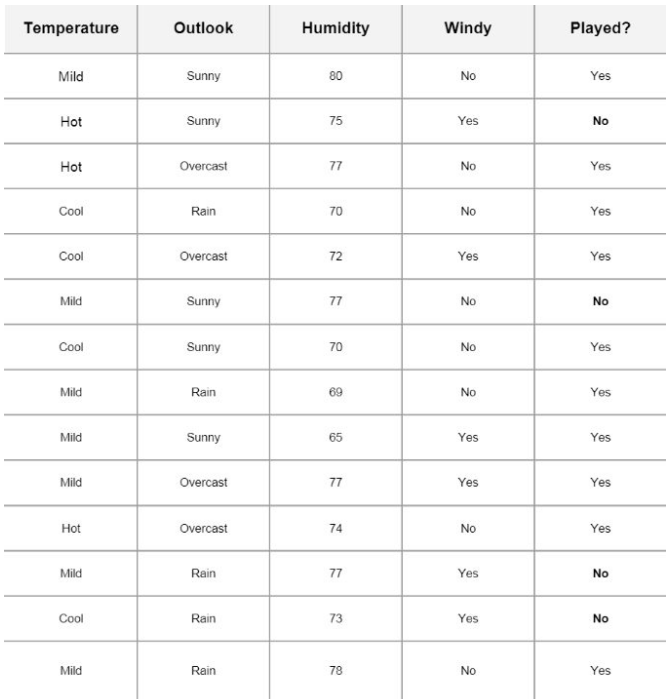

White box model: can explain to non-technical people. 
    <br> Also Naive Bayes and KNN (not logistic regression)

Beginning have root: then make decision on which side to go to. 
<br> go down to the bottom. Get label to tag to new test sample.


To predict whether this person is coming or not on a specific day, an intuitive way to do build a decision tree to "simulate" how he makes his decisions. 
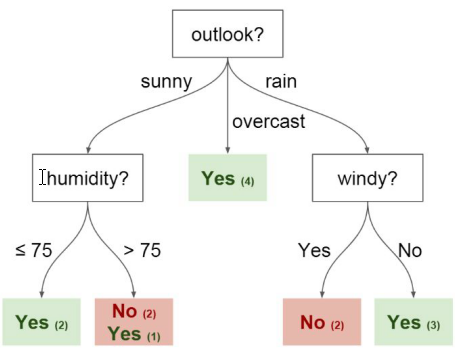

<font color='blue'> this is an example of decision tree in general, decision trees in sklearn does not work exactly in this way.. </font>

Root: test one and only one condition. Test whether outlook is sunny/overcast/rain
<br>Leaves are yes and no. Also the number (of cases)
<br>Sunny, humidity over 75: 2 no's and 1 yes. Since No is majority, say it is a no. 
<br>

### Key terms
**Node**

In the decision tree, or in the set of corresponding branching rules, a node is the graphical or rule representation of a split value.

**Leaf**

The end of a set of if-then rules, or branches of a tree—the rules that bring you to
that leaf provide one of the classification rules for any record in a tree.

**Impurity**

The extent to which a mix of classes is found in a subpartition of the data (the more mixed, the more impure).

At each node, check ONE property to a another NODE or A Leaf<br>
Leaf: gives label. 



# A small example
## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data
The dataset represents a number of patients who had kyphosis which is a spinal condition and they had an operation. The operation was a corrective spinal surgery. The samples in the dataset represents whether or not the kyphosis condition was absent or present after the operation.

- Kyphosis: whether the kyphosis is absent or present after the surgery
- Age: age of the person in month
- Number: the number of vertebrae involved in the operation
- Start: the number of the first vertebrae that was operated on

In [2]:
df = pd.read_csv('datasets/kyphosis.csv')

In [3]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
Kyphosis    81 non-null object
Age         81 non-null int64
Number      81 non-null int64
Start       81 non-null int64
dtypes: int64(3), object(1)
memory usage: 2.6+ KB


## Exploratory Data Analysis

We'll just check out a simple pairplot for this small dataset.

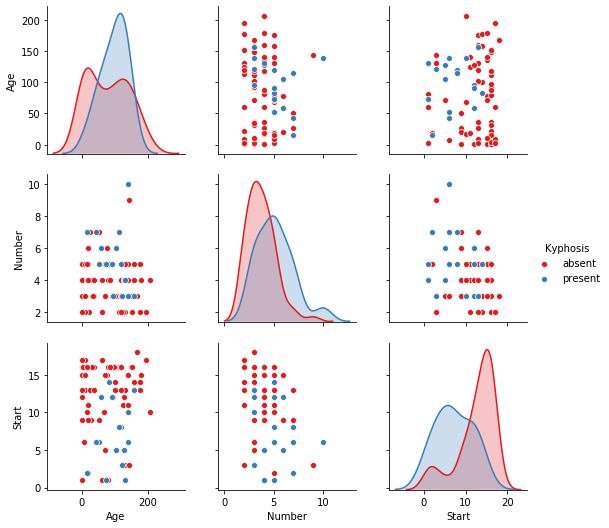

In [5]:
sns.pairplot(df,hue='Kyphosis',palette='Set1')
#unbalanced dataset (more red)- maybe misleading results

## Train Test Split

Let's split up the data into a training set and a test set!

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X = df.drop('Kyphosis',axis=1)
y = df['Kyphosis']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=42)

## Decision Trees

We'll start just by training a single decision tree.

In [9]:
from sklearn.tree import DecisionTreeClassifier

In [10]:
dtree = DecisionTreeClassifier()

In [11]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

## Prediction and Evaluation 

Let's evaluate our decision tree.

In [1]:
predictions = dtree.predict(X_test)

NameError: name 'dtree' is not defined

In [13]:
from sklearn.metrics import classification_report,confusion_matrix

In [14]:
print(classification_report(y_test,predictions))
#performance OK, not impressive. But dataset very small so acceptable. 

              precision    recall  f1-score   support

      absent       0.78      0.95      0.86        19
     present       0.50      0.17      0.25         6

    accuracy                           0.76        25
   macro avg       0.64      0.56      0.55        25
weighted avg       0.71      0.76      0.71        25



In [15]:
print(confusion_matrix(y_test,predictions))

[[18  1]
 [ 5  1]]


## Tree Visualization (you have to do this section on your local Jupyter)

Scikit learn actually has some built-in visualization capabilities for decision trees, you won't use this often and it requires you to install the pydotplus library, but here is an example of what it looks like and the code to execute this:

(**pydotplus** package is not included in Anaconda distribution or your local python, you may need to do "conda install pydotplus" in the command line first if you are runing this on your local machine.)

In [16]:
# run the command below in your Anaconda Prompt
#conda install pydotplus

In [17]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus 

features = list(df.columns[1:])
features

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


['Age', 'Number', 'Start']

You also need a stand-alone tool: Graphviz.

Download here: https://graphviz.gitlab.io/_pages/Download/Download_windows.html

After installing Graphviz, you also need to add the bin folder of installed path to the PATH environment variable:
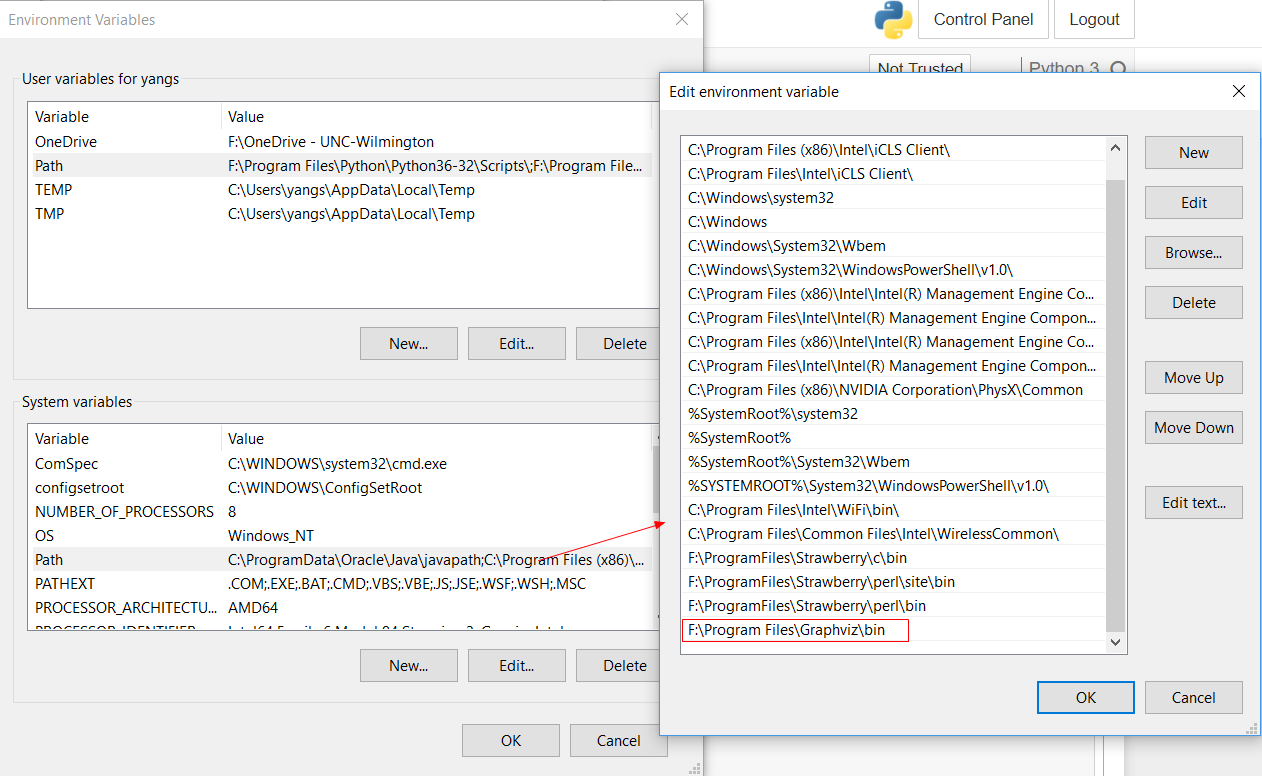

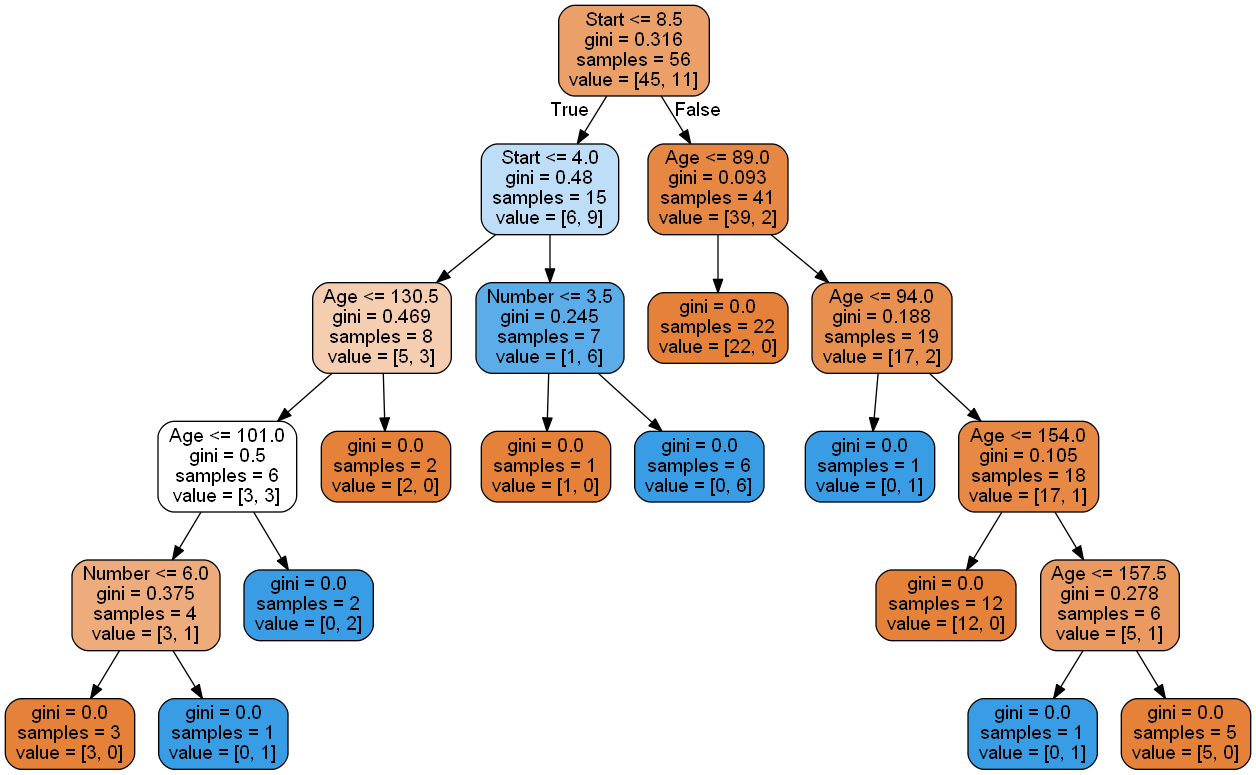

In [18]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

Binary Decision for each Node. Scikitlearn only binary decisions. 
Value:[12,0] : 12 absent, 0 present. Pure leaf. 
Big tree for only 3 features. Such a big tree not that necessary- decision trees need to be controlled. 

In [19]:
dtree.classes_

array(['absent', 'present'], dtype=object)

# Making Predictions

Suppose we have a new sample with Age = 18, Number = 10 and Start = 10, how do we make the prediction?

- You start at the root node.
- In this visualization, True branches are always on the left side.

Once we make the tree, we USE THE TREE TO MAKE PREDICTIONS, not use the training samples to make the prediction. <br>
KNN prediction slow (because have to compare to every training sample)<br>
So Decision Tree is very quick comparitively 


# To predict if an employee is leaving a company


In [20]:
df = pd.read_csv("datasets/HR_comma_sep.csv")
df.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [21]:
y = df["left"]
X = df.drop('left',axis=1)
X.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,0,sales,low
1,0.80,0.86,5,262,6,0,0,sales,medium
2,0.11,0.88,7,272,4,0,0,sales,medium
3,0.72,0.87,5,223,5,0,0,sales,low
4,0.37,0.52,2,159,3,0,0,sales,low


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.30, random_state=42)

### The cell below is left with an error deliberately

In [25]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
predictions = dtree.predict(X_test)
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

ValueError: could not convert string to float: 'low'

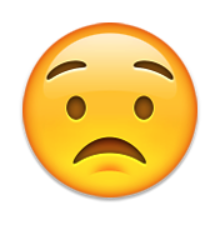
In theory, decision tree and forests work fine with categorical values. But in sklearn, this is not so.

dont want to do one hot encoder for low/medium/high because ordinal
label encoder: don't want to do because may label in a different way<br>
    0->low, 1->medium, 2->high ,<br>
    vs.
    0->low, 1->high, 2->high
    Want to do in correct order for decision tree. 

In [23]:
mymap1 = {'low':1,'medium':2,'high':3} #make a dictionary (so can undo later and in correct order) for salary
df = df.applymap(lambda s: mymap1.get(s) if s in mymap1 else s) #apply the dictionary 
df.head() #best way to deal with ORDINAL

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,1
1,0.80,0.86,5,262,6,0,1,0,sales,2
2,0.11,0.88,7,272,4,0,1,0,sales,2
3,0.72,0.87,5,223,5,0,1,0,sales,1
4,0.37,0.52,2,159,3,0,1,0,sales,1


## Exercise: 
- Apply the one hot encoder to the 'sales' column.
- Do the train-test-split again with the new dataset, make sure there is no categorical features in the dataset.
- Create a decision tree model to predict whether an employee is leaving.

In [25]:
# apply one hot encoder on the 'sales' column
#This is NOT ORDINAL, so ok to one hot encoder

cat_feats = ['sales']

final_data = pd.get_dummies(df,columns=cat_feats,drop_first=True) 

final_data.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical
0,0.38,0.53,2,157,3,0,1,0,1,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,2,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,2,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,1,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,1,0,0,0,0,0,0,1,0,0


In [27]:
# to make sure there is no more categorical features
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 18 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
salary                   14999 non-null int64
sales_RandD              14999 non-null uint8
sales_accounting         14999 non-null uint8
sales_hr                 14999 non-null uint8
sales_management         14999 non-null uint8
sales_marketing          14999 non-null uint8
sales_product_mng        14999 non-null uint8
sales_sales              14999 non-null uint8
sales_support            14999 non-null uint8
sales_technical          14999 non-null uint8
dtypes: float64(2), int64(7), uint8(9)
memory usage: 1.2 MB

In [28]:
# do the train-test split again
X = final_data.drop('left',axis=1)
y = final_data['left']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30, random_state=42)

# create a decision tree model
dtree=DecisionTreeClassifier()

# learn the X_train and y_train
dtree.fit(X_train,y_train)

# make predictions with the tree model and X_test
predictions=dtree.predict(X_test)

# print the classification_report
print(classification_report(y_test,predictions))

# print the confusion matrix
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      3428
           1       0.93      0.96      0.95      1072

    accuracy                           0.97      4500
   macro avg       0.96      0.97      0.96      4500
weighted avg       0.97      0.97      0.97      4500

[[3355   73]
 [  45 1027]]


Does pretty good job

# To sum up
- A decision tree is a set of “if-then-else” rules
- Pros:
    - Interpretability: we can read the acquired knowledge
        - "white box model"
    - can handle both continuous and discrete data in theory
        - sklearn does not do this way, for categorical features:
        - one hot encoder
        - or replace then with numbers
    - once we build the tree, the classification will be fast (remember the factor *m* for KNN complexity?)
    
    
- Cons?